# Project Details
Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future1. In fact, **on the 6th of December of 2017, Bitcoin has a market capitalization above $200 billion.**

<img src="https://assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px">

### Objectives
* To better understand the growth and impact of Bitcoin and other cryptocurrencies, we will explore the market capitalization of different cryptocurrencies.

### Data Source
> Data downloaded on the 6th of December of 2017 using the `coinmarketcap API` (NOTE: The public API went private in 2020 and is no longer available) named datasets/coinmarketcap_06122017.csv.

# Preparing & Processing Data

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd', 'market_cap_raw']]

# Counting the number of values
dec6['market_cap_raw'].count()

In [7]:
coin_market_cap_2017 = pd.read_csv('coinmarketcap_06122017.csv', index_col=0)

coin_market_cap_2017.info()
coin_market_cap_2017.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1325
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   24h_volume_usd      1270 non-null   float64
 1   available_supply    1031 non-null   float64
 2   id                  1326 non-null   object 
 3   last_updated        1326 non-null   int64  
 4   market_cap_usd      1031 non-null   float64
 5   max_supply          215 non-null    float64
 6   name                1326 non-null   object 
 7   percent_change_1h   1273 non-null   float64
 8   percent_change_24h  1270 non-null   float64
 9   percent_change_7d   1283 non-null   float64
 10  price_btc           1326 non-null   float64
 11  price_usd           1326 non-null   float64
 12  rank                1326 non-null   int64  
 13  symbol              1326 non-null   object 
 14  total_supply        1211 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 165.8

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [11]:
market_cap_raw = coin_market_cap_2017[['id', 'market_cap_usd']]
market_cap_raw.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


In [12]:
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

#### Discard the cryptocurrencies without a market capitalization

In [20]:
cap = market_cap_raw.query('market_cap_usd > 0')

cap.count()

id                1031
market_cap_usd    1031
dtype: int64

# Analyzing

### How big is Bitcoin compared with the rest of the cryptocurrencies?

In [22]:
cap.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


In [26]:
# Top 10 cap market
cap10 = cap[:10].set_index('id')
cap10

,market_cap_usd
id,
bitcoin,2.130493e+11
ethereum,4.352945e+10
bitcoin-cash,2.529585e+10
iota,1.475225e+10
ripple,9.365343e+09
dash,5.794076e+09
litecoin,5.634498e+09
bitcoin-gold,4.920065e+09
monero,4.331688e+09


In [31]:
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)
cap10

,market_cap_usd,market_cap_perc
id,,
bitcoin,2.130493e+11,56.918669
ethereum,4.352945e+10,11.629410
bitcoin-cash,2.529585e+10,6.758088
iota,1.475225e+10,3.941238
ripple,9.365343e+09,2.502063
dash,5.794076e+09,1.547956
litecoin,5.634498e+09,1.505323
bitcoin-gold,4.920065e+09,1.314454
monero,4.331688e+09,1.157262


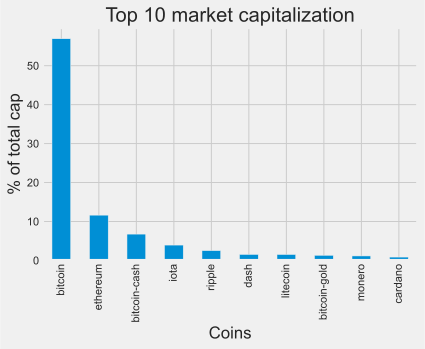

In [40]:
%matplotlib inline
plt.style.use('fivethirtyeight')

ax = cap10.market_cap_perc.plot.bar(title='Top 10 market capitalization')

ax.set_ylabel('% of total cap')
ax.set_xlabel('Coins')

plt.show()

While the plot above is informative enough, it can be improved. Bitcoin is too big, and **the other coins are hard to distinguish because of this**. Instead of the percentage, let's use `a log10 scale of the "raw" capitalization`. Plus, let's use color to group similar coins and make the plot more informative1.
For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin blockchain2. Ethereum and Cardano both offer Turing Complete smart contracts. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.

This coloring is a simplification. There are more differences and similarities that are not being represented here

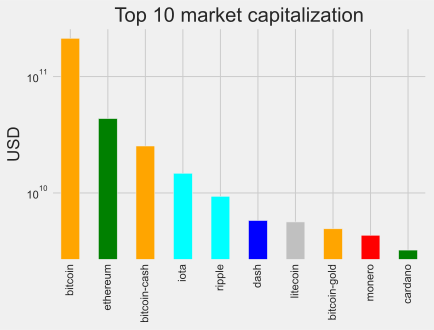

In [55]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

ax = cap10.market_cap_usd.plot.bar(title='Top 10 market capitalization', logy=True, color = COLORS)

ax.set_ylabel('USD')
ax.set_xlabel('');

### Volatility in cryptocurrencies3
The cryptocurrencies market has been spectacularly volatile since the first exchange opened.
Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.

In [73]:
volatility = coin_market_cap_2017[['id', 'percent_change_24h', 'percent_change_7d']]
volatility.head()

,id,percent_change_24h,percent_change_7d
0,bitcoin,7.33,17.45
1,ethereum,-3.93,-7.33
2,bitcoin-cash,-5.51,-4.75
3,iota,83.35,255.82
4,ripple,-3.70,-14.79


In [74]:
volatility = volatility.dropna().set_index('id')
volatility.head()

,percent_change_24h,percent_change_7d
id,,
bitcoin,7.33,17.45
ethereum,-3.93,-7.33
bitcoin-cash,-5.51,-4.75
iota,83.35,255.82
ripple,-3.70,-14.79


In [75]:
volatility = volatility.sort_values(by='percent_change_24h', ascending=True)
volatility.head(
)

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


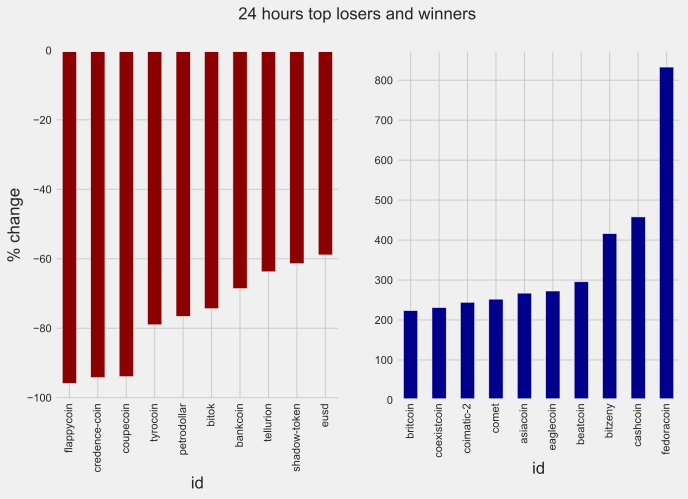

In [82]:
# Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    # Setting the main title to TITLE
    fig.suptitle(title)
    # Setting the ylabel to "% change"
    ax.set_ylabel('% change')
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

### Let's check the weekly Series too
800% daily increase?! Why are we doing this tutorial and not buying random coins?1

After calming down, let's reuse the function defined above to see what is going weekly instead of daily.

Take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time

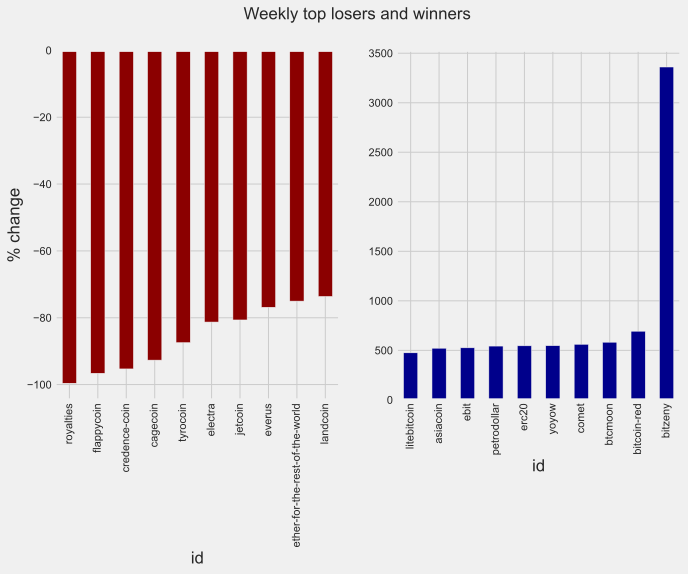

In [83]:
# Sorting in ascending order
volatility7d = volatility.sort_values(by='percent_change_7d', ascending=True)

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

In [87]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap_usd > 10000000000')

# Printing out largecaps
largecaps.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


### Most coins are tiny
Note that many coins are not comparable to large companies in market cap
These are the market cap definitions from Investopedia:

* Large cap: +10 billion
* Mid cap: 2 billion - 10 billion
* Small cap: 300 million - 2 billion
* Micro cap: 50 million - 300 million
* Nano cap: Below 50 million

In [110]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 300000000')

# Same as above for micro ...
micro = capcount('market_cap_usd > 50000000 & market_cap_usd < 300000000')

# ... and for nano
nano =  capcount('market_cap_usd < 50000000')

In [111]:
values = [biggish, micro, nano]
values

[39, 96, 896]

<BarContainer object of 3 artists>

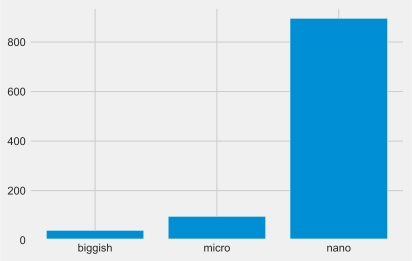

In [112]:
plt.bar(x=LABELS, height=values)

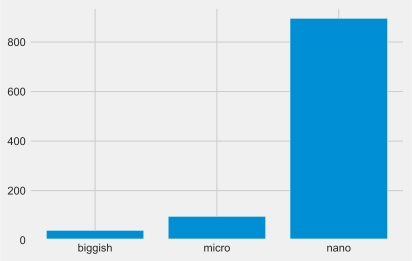

In [113]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the not_so_small cryptos
biggish = capcount("market_cap_usd > 3E+8")

# Same as above for micro ...
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# ... and for nano
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
plt.bar(range(len(values)), values, tick_label=LABELS);

**Note**

This project is one of DataCamp Projects.

`DONE ON`: 25.09.2021